# SweetHour Shopping Mall Project, 2020

### This project aims at segmenting customers in terms of their monthly income and expenditures in the company. To achieve this, the customers data will be explored, pre-processed and thereafter, a model will be built using KMeans Clustering, a tool in Machine Learning. 

Content

1. Data Exploration and Visualization
2. Machine Learning for building model
3. Final Segmentation Visualization using Scatter plot
4. Observations and Recommendations
5. General analysis(Age and Gender inclusive) using heatmap

1. Data Exploration and Visualization

In [1]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt #Data Visualization 
%matplotlib inline
import seaborn as sns  #Python library for Visualization

In [2]:
#Import the dataset

df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
#total rows and colums in the dataset
df.shape

(200, 5)

In [6]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are no missing values

In [8]:
#check fo missing values in computation
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

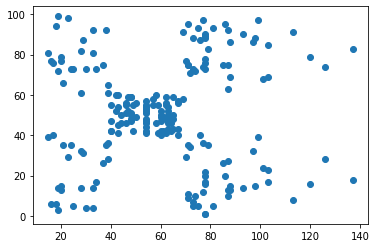

In [10]:
#Check how features relate
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

Clustering can be said to be five

Machine Learning

In [24]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
#The sillhe
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
Sscore = []
nrange = np.arange(2,11)
for n in nrange:
    km = KMeans(n_clusters=n)
    Clusters = km.fit_predict(X)
    sil_score = silhouette_score(X, Clusters)
    Sscore.append(sil_score)
    
Sscore

[0.2918426367691145,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.5288104473798049,
 0.4575689106804838,
 0.45678676900594906,
 0.4516611669212085]

Text(0, 0.5, 'Silhouette_score')

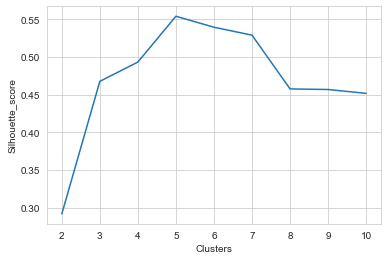

In [21]:
#plotting
sns.set_style('whitegrid')
sns.lineplot(x=nrange, y=Sscore, legend='full')

#usestyleas('ggplot')
plt.xlabel('Clusters')
plt.ylabel('Silhouette_score')

Clearly 5 has the the highest score. So 5 clusters is used

In [22]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X)

In [23]:
df['Clusters'] = y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


In [25]:
#group into respective clusters
df0 = df[df['Clusters'] == 0]
df1 = df[df['Clusters'] == 1]
df2 = df[df['Clusters'] == 2]
df3 = df[df['Clusters'] == 3]
df4 = df[df['Clusters'] == 4]

Visualization of Clustering

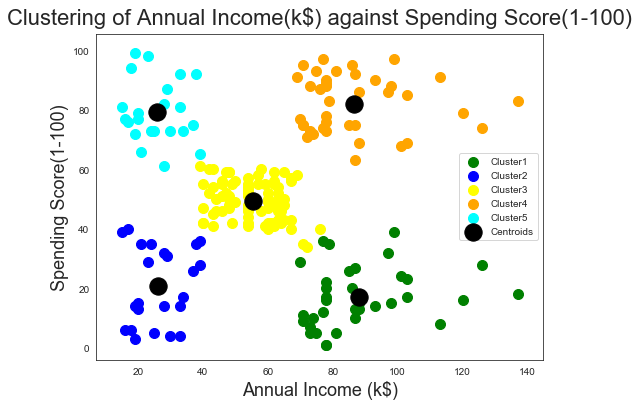

In [40]:
sns.set_style('white')
plt.figure(figsize=(8,6))
plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'], s=100, color='green' , label='Cluster1')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], s=100, color='blue' , label='Cluster2')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], s=100, color='yellow' , label='Cluster3')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], s=100, color='orange' , label='Cluster4')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], s=100, color='cyan' , label='Cluster5')

#for centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=300, color='black', label='Centroids')

plt.grid(False)
plt.title('Clustering of Annual Income(k$) against Spending Score(1-100)',fontsize=22, y=1.01)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score(1-100)', fontsize=18)
plt.legend()

#### Observations and Recommendation

Observations
#Taking each Cluster as Customer Segment
1. Customer Segment 1 (Green)  -> earning high but spending less
2. Customer Segment 2 (Blue)   -> earning less , spending less
3. Customer Segment 3 (Yellow) -> average in terms of earning and spending 
4. Customer Segment 4 (Orange) -> earning high and spending high [TARGET SET]
5. Customer Segment 5 (Cyan)     -> earning less , spending more

Recommendations
1. Customers in Segment 4 should be added into some alerting system where email can be sent to them on daily basis as these are easy to converse wherein others we can set like once in a week or once in a month
2. Persuasive messages should be sent to customers in segment 1 and 3 to find out what they would need and more advertisements of the company's products be made through emails or other means 
3. Products not too expensive should be advertised more to customers in segment 5 as they are willing to spend


#### General Analysis of Customers

In [63]:
#df.head()

Put the ages into group for analysis
1. ages < 24 as Young
2. ages < 50 as middle aged
3. ages >49 as Old

In [71]:
def Agegroup(age):
    if age < 25:
        return 'Young'
    if age < 50:
        return 'Middle-age'
    else:
        return 'Old'
    
df['AgeGroup'] = df['Age'].apply(Agegroup)
        

In [64]:
#df.head()

In [72]:
#change Gender and AgeGroup column to integers
df_dum = pd.get_dummies(df, prefix='', prefix_sep='')
#df_dum.head()

In [73]:
#df_dum.drop(['CustomerID','Age'], axis='columns').head()

In [74]:
#rearranging
df_new = df_dum[['Male','Female','Young','Middle-age','Old','Annual Income (k$)','Spending Score (1-100)']]
#df_new.head()

In [75]:
#putting all in a standard scale
#import standard scale metrics

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
#df_scaled

In [76]:
df_scaled = pd.DataFrame(df_scaled, columns=df_new.columns)
#df_scaled.head()

In [77]:
km = KMeans(n_clusters=5)
km.fit(df_scaled)

#km.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Visualize using heat map

Text(0.5, 1.01, 'Heatmap of Features against Clusters')

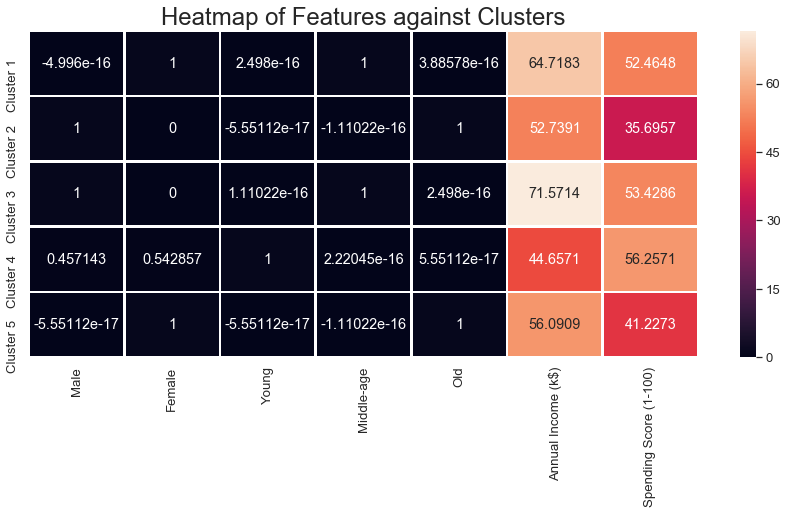

In [80]:

data = scaler.inverse_transform(km.cluster_centers_)

plt.figure(figsize=(15,6))
sns.set(font_scale=1.2) #set the fontsize
sns.heatmap(data, cmap='rocket', annot=True, linewidths=1.5, xticklabels=df_new.columns, fmt='g',
            yticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

plt.title('Heatmap of Features against Clusters', fontsize=24, y=1.01)

Note: The Clusters label are randomly chosen

Observations

1. Cluster 1 : Earning high but spending high. Almost all customers here are middle-aged. This is similar to Customer Segment 4
2. Cluster 2 : Earning less , spending less. All customers here are male and old. This is similar to Customer Segment 2
3. Cluster 3 : Earning high and spending less. This is because their spending score is relatively below that of cluster 4 with low annual income.All customers here are male and middle-age This is similar to Customer Segment 1
4. Cluster 4 : Earning less , spending more. Customers here are a mixture of young male and female. This is similar to Customer Segment 5
5. Cluster 5 : Average in terms of earning and spending(relatively). Customers are mostly female and old. This is similar to Customer Segment 3 